Taking the results of btag_ratio and combining the ratios according to the cross-section

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
year=2018
with open(f"studies/SFs/btag_extrap_ratio_{year}_systs_v2.json", "r") as f:
    res = json.load(f)
res

{'dy_ptz6': {'null': {'ratios': {'inclusive': {'nominal': 0.8375235735408024,
     'cferr1_up': 0.7918950477222779,
     'cferr2_up': 0.814136190095592,
     'hf_up': 0.8830723262652801,
     'hfstats1_up': 0.8365971545550924,
     'hfstats2_up': 0.8385786315182596,
     'lf_up': 0.8423098196169185,
     'lfstats1_up': 0.8534937154625021,
     'lfstats2_up': 0.8547912705642005,
     'cferr1_down': 0.8865323450503999,
     'cferr2_down': 0.8623234387933484,
     'hf_down': 0.7995949356381289,
     'hfstats1_down': 0.8384728515188348,
     'hfstats2_down': 0.836503635728999,
     'lf_down': 0.834720536248044,
     'lfstats1_down': 0.8220204104641933,
     'lfstats2_down': 0.8202010542225906},
    'etau': {'nominal': 0.8385479752383694,
     'cferr1_up': 0.7932746895463412,
     'cferr2_up': 0.8159537699296975,
     'hf_up': 0.8828591759018851,
     'hfstats1_up': 0.8375878414307749,
     'hfstats2_up': 0.8395630094137642,
     'lf_up': 0.8438265925541376,
     'lfstats1_up': 0.8547641141

In [3]:
import sys
sys.path.append("/grid_mnt/data__data.polcms/cms/cuisset/ZHbbtautau/frameworkJobs/config/")
from xs_config import cross_section_dict
cross_section_dict

{'zz_sl_signal': 0.172,
 'zz_sl': 3.676,
 'zh_htt': 0.055,
 'zh_zbb_htt_signal': 0.00837,
 'zh_zbb_htt_background': 0.047,
 'zh_hbb_zll': 0.0482,
 'zh_ztt_hbb_signal': 0.0161,
 'zh_ztt_hbb_background': 0.0321,
 'ggZH_HToBB_ZToLL': 0.006954,
 'ZprimeToZH_ZToBB_HToTauTau': 0.0091,
 'ZprimeToZH_ZToTauTau_HToBB': 0.0179,
 'GluGluToXToZZTo2B2Tau': 0.0101,
 'wjets_FXFX': 61526.7,
 'wjets_FXFX_0j': 50045.91335840216,
 'wjets_FXFX_1j': 8374.488571076316,
 'wjets_FXFX_2j': 3106.2980705215136,
 'wjets_MLM': 61526.7,
 'wjets_MLM_1j': 9024.0,
 'wjets_MLM_2j': 2832.0,
 'wjets_MLM_3j': 820.7,
 'wjets_MLM_4j': 385.5,
 'wjets_ht1': 1465.356526823835,
 'wjets_ht2': 1420.8133432337108,
 'wjets_ht3': 385.8124978652311,
 'wjets_ht4': 51.31603176164841,
 'wjets_ht5': 12.780467291627993,
 'wjets_ht6': 5.6261467273064785,
 'wjets_ht7': 1.31573711527752,
 'wjets_ht8': 0.030220836866530536,
 'dy': 6424.0,
 'dy_ptz1': 1485.0,
 'dy_ptz2': 397.4,
 'dy_ptz3': 97.2,
 'dy_ptz4': 3.701,
 'dy_ptz5': 0.5086,
 'dy_ptz6'

In [4]:
category_names = ["inclusive", "etau", "mutau", "tautau", "e&mutau"]
btag_systs_nojec = ["cferr1", "cferr2", "hf", "hfstats1", "hfstats2", "lf", "lfstats1", "lfstats2"]
jec_nba_to_label_map = {
"jec_1": "FlavorQCD",
"jec_2": "RelativeBal",
"jec_3": "HF",
"jec_4": "BBEC1",
"jec_5": "EC2",
"jec_6": "Absolute",
"jec_7": f"BBEC1_{year}",
"jec_8": f"EC2_{year}",
"jec_9": f"Absolute_{year}",
"jec_10": f"HF_{year}",
"jec_11": f"RelativeSample_{year}",
}

In [5]:
def get_xs(dataset):
    if dataset in ["zz_sl_background", "zz_bbtt"]:
        dataset = "zz_sl" 
    if dataset == "wjets_ht0":
        return 53870
    return cross_section_dict[dataset]
datasets_toIgnore = ["zz_sl_signal", "zz_sl_background"] + [f"dy_ptz{i}" for i in range(7)] + ["dy_0j", "dy_1j", "dy_2j"] + [f"wjets_ht{i}" for i in range(1, 7)] # skip wjets HT binned
jec_nba_to_branch_map = {
"jec_1": "_smeared_FlavorQCD",
"jec_2": "_smeared_RelativeBal",
"jec_3": "_smeared_HF",
"jec_4": "_smeared_BBEC1",
"jec_5": "_smeared_EC2",
"jec_6": "_smeared_Absolute",
"jec_7": f"_smeared_BBEC1_{year}",
"jec_8": f"_smeared_EC2_{year}",
"jec_9": f"_smeared_Absolute_{year}",
"jec_10": f"_smeared_HF_{year}",
"jec_11": f"_smeared_RelativeSample_{year}",
}

In [13]:
ratios = {}
for category in category_names:
    sums_weights_noReshapeWeight = 0.
    for dataset, res_dataset in res.items():
        if dataset in datasets_toIgnore: continue
        xs = get_xs(dataset)
        sums_weights_noReshapeWeight += res[dataset]['null']["sums_weights_noReshapeWeight"][category]*xs

    uncerts_nojec = ["nominal"] + [s+"_up" for s in btag_systs_nojec] + [s+"_down" for s in btag_systs_nojec] 
    uncerts_jec = [s+"_up" for s in jec_nba_to_branch_map] + [s+"_down" for s in jec_nba_to_branch_map]
    sums_weights_withReshapeWeight = {}
    for uncertainty in uncerts_nojec:
        sums_weights_withReshapeWeight_current = 0.
        for dataset, res_dataset in res.items():
            if dataset in datasets_toIgnore: continue
            xs = get_xs(dataset)
            sums_weights_withReshapeWeight_current += res[dataset]['null']["sum_weights_withReshapeWeight"][category][uncertainty]*xs
        sums_weights_withReshapeWeight[uncertainty] = sums_weights_withReshapeWeight_current

        ratios.setdefault(category, dict())[uncertainty] = sums_weights_noReshapeWeight/sums_weights_withReshapeWeight_current
    for uncertainty in uncerts_jec:
        sums_weights_withReshapeWeight_current = 0.
        for dataset, res_dataset in res.items():
            if dataset in datasets_toIgnore: continue
            xs = get_xs(dataset)
            sums_weights_withReshapeWeight_current += res[dataset][uncertainty]["sum_weights_withReshapeWeight"][category][uncertainty]*xs
        sums_weights_withReshapeWeight[uncertainty] = sums_weights_withReshapeWeight_current

        ratios.setdefault(category, dict())[uncertainty] = sums_weights_noReshapeWeight/sums_weights_withReshapeWeight_current
    
    print(sums_weights_noReshapeWeight/sums_weights_withReshapeWeight["nominal"])
ratios

0.9671699313416069
0.952765609293455
0.9728432694666789
0.9743467398143694
0.9666608062204685


{'inclusive': {'nominal': 0.9671699313416069,
  'cferr1_up': 0.9270357409945924,
  'cferr2_up': 0.9451780269078355,
  'hf_up': 0.9816825009229065,
  'hfstats1_up': 0.9671319632409302,
  'hfstats2_up': 0.9677609928069286,
  'lf_up': 0.9709146117546615,
  'lfstats1_up': 0.9836949216471206,
  'lfstats2_up': 0.9806800432496516,
  'cferr1_down': 1.0116390042865628,
  'cferr2_down': 0.9911663324846456,
  'hf_down': 0.9580820901299947,
  'hfstats1_down': 0.9672608005439457,
  'hfstats2_down': 0.9666222212678671,
  'lf_down': 0.9663440921406027,
  'lfstats1_down': 0.9510446760119237,
  'lfstats2_down': 0.9539413881307427,
  'jec_1_up': 0.9358681405749911,
  'jec_2_up': 0.9853990220598143,
  'jec_3_up': 0.9671402982142959,
  'jec_4_up': 0.948012127848114,
  'jec_5_up': 0.9646424004589071,
  'jec_6_up': 0.926495536757106,
  'jec_7_up': 0.9636027285363238,
  'jec_8_up': 0.9651996170765296,
  'jec_9_up': 0.9525211648510137,
  'jec_10_up': 0.9671140612695002,
  'jec_11_up': 1.003270079400706,
  'je

In [ ]:
systs_plotting_order = ["nominal"]
systs_label_plotting_order = ["Nominal"]
for s in btag_systs_nojec: 
    systs_plotting_order.extend([s+"_up", s+"_down"])
    systs_label_plotting_order.extend([s + " Up", s+ " Down"])
for s in jec_nba_to_branch_map:
    systs_plotting_order.extend([s+"_up", s+"_down"])
    systs_label_plotting_order.extend([jec_nba_to_label_map[s] + " Up", jec_nba_to_label_map[s] + " Down"])
    

In [15]:
ratios["tautau"]["nominal"]

0.9743467398143694

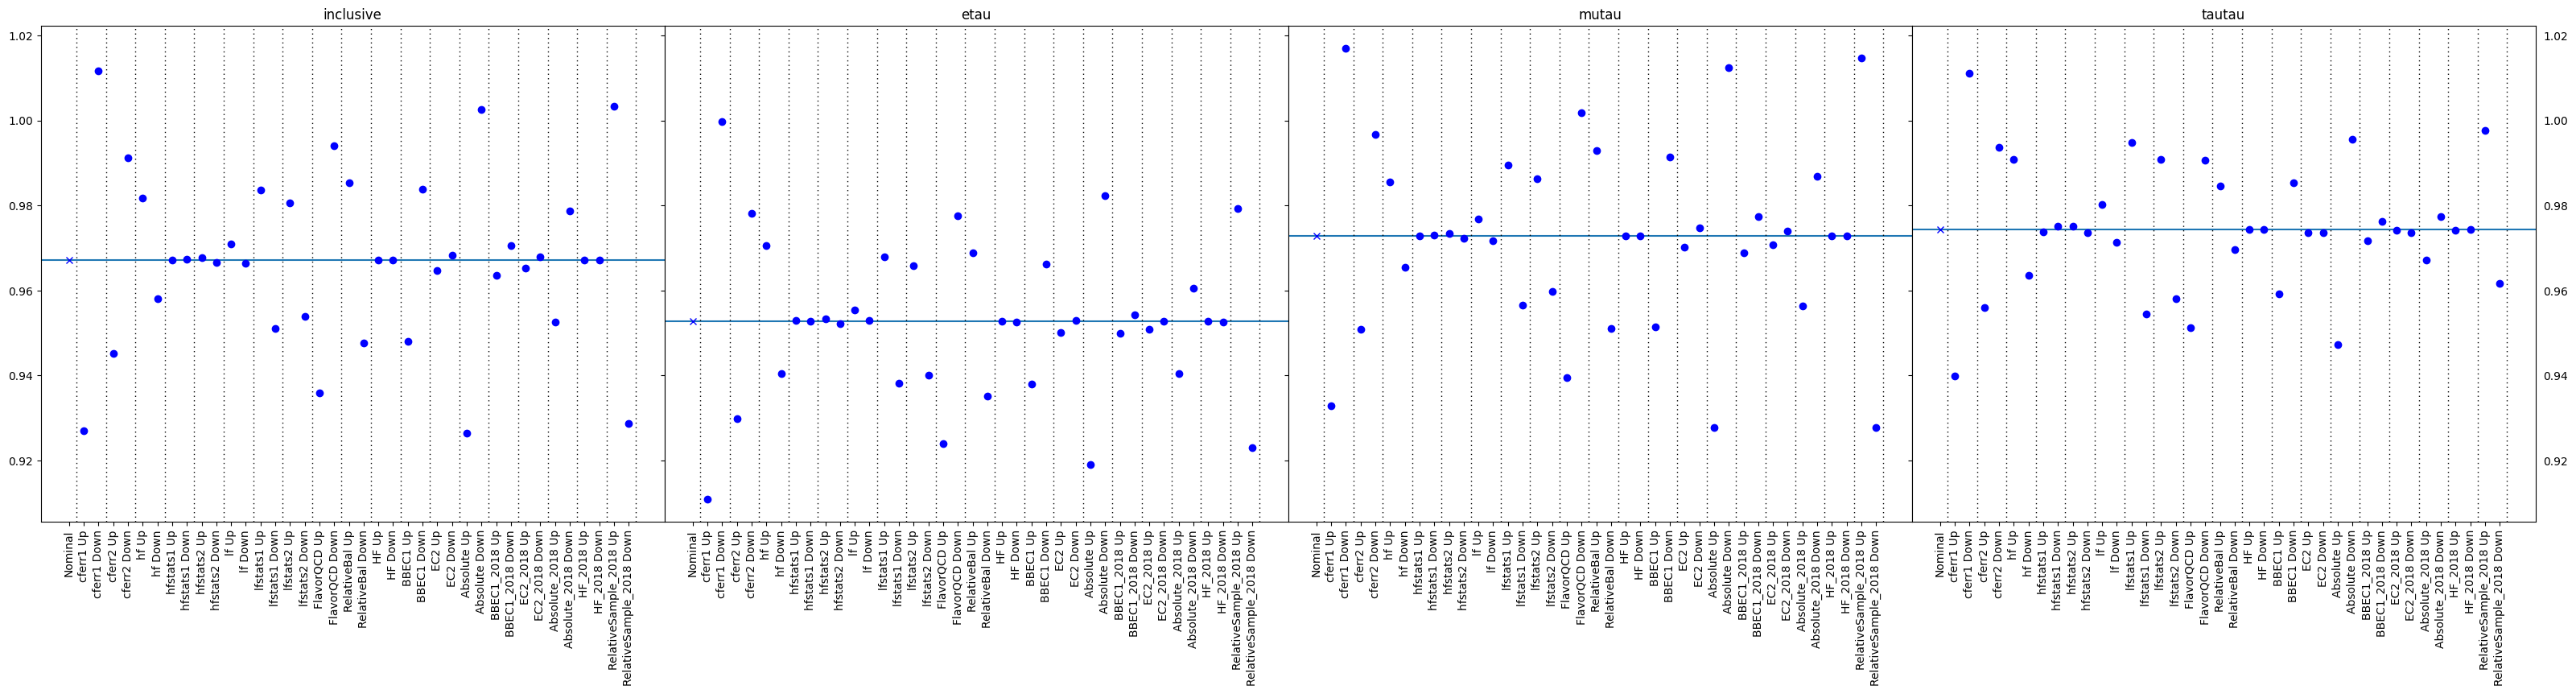

In [16]:

regions = ["inclusive", "etau", "mutau", "tautau"]
fig, axs = plt.subplots(1, len(regions), figsize=(10*len(regions), 8), sharey=True)
plt.subplots_adjust(wspace=0.)
axs[-1].tick_params(labelright=True)
for region, ax in zip(regions, axs):
    plt.sca(ax)
    ys = list()
    for s in systs_plotting_order:
        ys.append(ratios[region][s])
    ys = np.array(ys)
    xs = np.arange(0, len(ys), 1)
    plt.axhline(ys[0])
    for i in np.arange(0.5, len(ys), 2):
        plt.axvline(i, ls=(0,(1, 3)), color="black", lw=1)
    plt.plot(xs[:1], ys[:1], 'bx')
    plt.plot(xs[1:], ys[1:], 'bo')
    plt.xticks(xs, systs_label_plotting_order, rotation="vertical")
    ax.set_title(region)